<a href="https://colab.research.google.com/github/Technology-for-the-Poorest-Billion/2025-Majicom-WaterCooling/blob/main/Active%20cooling%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Several options were identified as possibilities of cooling water in the tank:

- Cooling as it is dispensed with either Peltier, or a cycle
- Cooling the whole water tank with either Peltier or a cycle
- Cooling a smaller tank prior to dispensal
- Heat exchanger with the tap water


# 1. Cooling as it is dispensed:

In [ ]:
time = 10 #s
c = 4200 #Heat capacity of water in J/kg/K
m = 0.5 #kg
dT = 5 #K
Energy = m*c*dT
print(f"Energy necessary to cool the water = {Energy:.0f} Joules")
Power = Energy/time
print(f"Power necessary to cool the water = {Power:.0f} Watts")


Energy necessary to cool the water = 10500 Joules
Power necessary to cool the water = 1050 Watts


1 kW of peak cooling power is a lot. However, that translates to even more electric power needed, hence the COP (efficiency) of the cooling system is of great importance. However, since the start up time required is very short, only Peltier modules would be applicable. Cycle systems require at least 2 min start up time to reach their cooling power, so they are nmot suitable for cooling on demand.

In [ ]:
#Peltier efficiency
eff = 0.5 #might be optimistic, we could check
Epower = Power/eff
print(f"Peak power necessary to cool the water = {Epower:.0f} Watts")

Energy necessary to cool the water = 2100 Joules


The peak power requirement is high and would require the use of several high power peltier modules. The hot side would also require some cooling system.
This power could be stored in the battery for use and be constantly recharged from the solar panels

In [ ]:
#Assuming 1 user per 30 seconds
average_time = 30 #s
Average_Power = Epower*time/average_time
print(f"Average power necessary to cool the water = {Average_Power:.0f} Watts")

Average power necessary to cool the water = 700 Watts


This would result in large area of panels needed, but could nevertheless be possible. One other possible consideration could be the rate of heat transfer in the pipes. To allow a large temperature drop large area would be needed.

In order to check the cooling capabilities of Peltier cells, the following experimental setup is considered. A series of Peltier cells is placed in a row over a rectangular cooling channel. This geometry is chosen for its simplicity in analysis and acts as a first guess and an approximation. It aims to determine whether a simple setup without a complicated heat exchanger is possible to cool hte water.


In [5]:
#Physical Paramenters:
d = 0.01 #channel thickness
w = 0.062 #channel width (same as teh width of the peltier modules)
m = 0.05 #kg/s - mass flow
c = 4200 #Heat capacity of water in J/kg/K
dT = 5 #K
mu = 0.001 #dynamic viscosity
rho = 1000 #kg/m3
k = 0.603 #thermal conductivity of water

Bulk_velocity = m/(rho*d*w)
print(f"Bulk velocity = {Bulk_velocity:.3e} m/s")

Re = rho*Bulk_velocity*d/mu
print(f"Reynolds number = {Re:.0f}")




Bulk velocity = 8.065e-02 m/s
Reynolds number = 806


Low Reynolds number suggests laminar flow. It can be assumed that it is fully developed and hence given by the equation

In [9]:
import sympy as sp

u , Ub , y , d = sp.symbols('u U_b y d')
u = 2 *Ub * (1 - (y/d)**2)
u

2*U_b*(1 - y**2/d**2)

# 2. Cooling the whole tank

This idea is centred on pumping the water out of the tank and passing through a cooling circuit before returning again to the container. This allows to run the cooling circuit the whole time and would make the use of not just peltier but also cycle coolers possible. However this introduces the heat losses from the tank and it may interfere with the passive cooling.

In [ ]:
#Just average Power needs to be supplied
#For Peltier:
print(f"Average power necessary to cool the water using Peltier modules = {Average_Power:.0f} Watts")

#For cycle coolers:
COP = 1.5 #needs to eb checkd for an exact model
Cycle_power = Energy/average_time/COP
print(f"Average power necessary to cool the water using cycle coolers = {Cycle_power:.0f} Watts")


Average power necessary to cool the water using Peltier modules = 700 Watts
Average power necessary to cool the water using cycle coolers = 233 Watts


The results from this calculation suggest that a cycle cooler would allow large energy savings, however at the cost of much higher complexity.

An interesting comparison is one to a home fridge. A modern fridge uses between 350 and 500 Watts. From this angle it may seem that the system is very inefficient and power hungry. However, household fridge in normal operation uses that power just to maintain its' temperature, without taking constantly cooling more mass.

Another important factor is to consider the heat losses from the tank, this is done in the cell below.

In [ ]:
Power_aim =0.5/30 # half a litre per 30 second, keep the cold tank level constant
dT = 10 # total of 10 degree temperature drop compared to the outside
capacity = 60 * 0.001 #litres
R1 = (capacity/(2*np.pi))**(1/3)
L = 2* R1
t = 0.01 #Assume 1cm thick polystyren insulation as an example
R2 = (1+t/R1)*R1
k =  0.12
def nusselt_number(Ra_L, Pr):
    numerator = 0.387 * Ra_L**(1/6)
    denominator = (1 + (0.492 / Pr)**(9/16))**(8/27)
    Nu_L = (0.825 + numerator / denominator)**2
    return Nu_L
T_s = 273+17    # Surface temperature in K
T_inf = 273 +27  # Ambient temperature in K
L = 0.5        # Characteristic length in meters
nu = 1.5e-5    # Kinematic viscosity (m^2/s)
alpha = 2.2e-5 # Thermal diffusivity (m^2/s)
g=9.81
kair = 0.0273 #thermal conductivity of air
def rayleigh_number(L):
    # Example usage
    T_film = (T_s + T_inf) / 2  # Film temperature (K)
    beta = 1 / T_film           # Thermal expansion coefficient (1/K), ideal gas approx.
    Pr = nu / alpha             # Prandtl number
    Gr_L = abs((g * beta * (T_s - T_inf) * L**3) / (nu**2) ) # Grashof number
    Ra_L = Gr_L * Pr
    return Ra_L
Pr = nu/alpha
Ra_L = rayleigh_number(L)
Nu_L = nusselt_number(Ra_L, Pr)
print(f"Nu_L = {Nu_L:.2e}")
h = Nu_L * kair / L
print(f"h = {h:.2e}")

Rconv = 1/(h*2*np.pi*L*R2)
print(Rconv)
Rtherm = 1/(2*np.pi*k*L/np.log(R2/R1)) + Rconv
Q = dT/Rtherm
print(Q)
#When a tank is filled this is the amount of energy used to cool it
#This is much less than the heat required to cool the water in the fist place

Nu_L = 6.51e+01
h = 3.55e+00
0.4033052270354076
19.03031673543144


Heat losses were calculated to be on the order of magnitude of 10-20 Watts. This leads to the conclusion that the main part of power would be used on cooling new water rather than keeping teh water in the tank cool. This model may not be too precise in several aspects: if the tank is in the sun the temperature inside might be considerably higher and the effect of passive cooling on this is unknown. However, this

#Side quest:

Simulation ended at 3602.88 seconds
Total customers arrived: 113
Customers served: 106
Customers dropped (queue full): 6
Water dispensed from Tank A: 47.00 litres
Water dispensed from Tank B: 6.00 litres


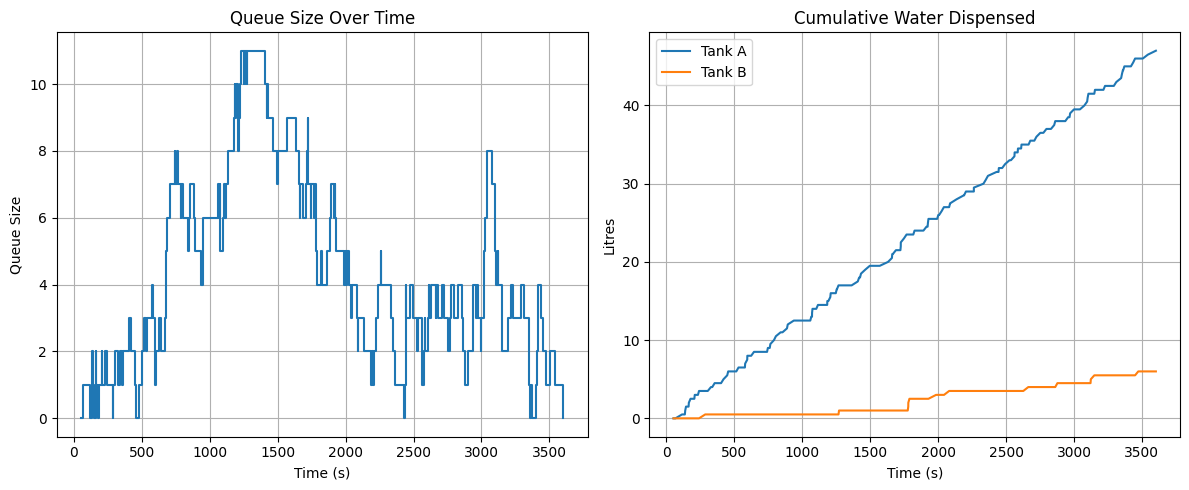


Steady-State Probabilities:
P(0) = 0.09091
P(1) = 0.09091
P(2) = 0.09091
P(3) = 0.09091
P(4) = 0.09091
P(5) = 0.09091
P(6) = 0.09091
P(7) = 0.09091
P(8) = 0.09091
P(9) = 0.09091
P(10) = 0.09091


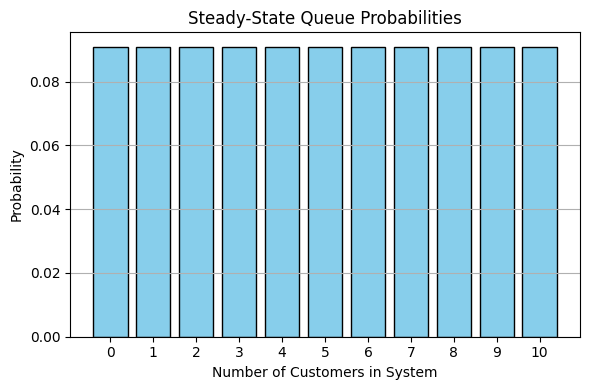

In [2]:
import random
import heapq
import matplotlib.pyplot as plt
import numpy as np


class MM1KWaterQueue:
    def __init__(self, arrival_rate, service_rate, capacity, simulation_time):
        self.arrival_rate = arrival_rate  # λ
        self.service_rate = service_rate  # μ
        self.capacity = capacity
        self.simulation_time = simulation_time

        # Queue and server
        self.clock = 0
        self.queue = []
        self.server_busy = False

        # Customer stats
        self.total_customers = 0
        self.served_customers = 0
        self.dropped_customers = 0

        # Water system
        self.tank_a_capacity = 2.0
        self.tank_b_capacity = 300.0
        self.tank_a_volume = 2.0
        self.tank_b_volume = 300.0
        self.tank_a_fill_rate = 0.4/30  # litres/sec
        self.last_update_time = 0.0

        # Water tracking
        self.total_from_a = 0.0
        self.total_from_b = 0.0

        # Event list
        self.event_list = []

        # For plotting
        self.time_points = []
        self.queue_sizes = []
        self.water_from_a = []
        self.water_from_b = []

    def schedule_event(self, time, event_type):
        heapq.heappush(self.event_list, (time, event_type))

    def update_tanks(self):
        time_passed = self.clock - self.last_update_time
        refill_amount = time_passed * self.tank_a_fill_rate

        if self.tank_a_volume < self.tank_a_capacity:
            refill = min(refill_amount, self.tank_a_capacity - self.tank_a_volume)
            actual_refill = min(refill, self.tank_b_volume)
            self.tank_a_volume += actual_refill
            self.tank_b_volume -= actual_refill

        self.last_update_time = self.clock

    def record_stats(self):
        size = len(self.queue) + (1 if self.server_busy else 0)
        self.time_points.append(self.clock)
        self.queue_sizes.append(size)
        self.water_from_a.append(self.total_from_a)
        self.water_from_b.append(self.total_from_b)

    def run(self):
        # Schedule first arrival
        self.schedule_event(self.clock + random.expovariate(self.arrival_rate), "arrival")

        while self.event_list and self.clock < self.simulation_time:
            self.clock, event_type = heapq.heappop(self.event_list)
            self.update_tanks()
            self.record_stats()

            if event_type == "arrival":
                self.handle_arrival()
            elif event_type == "departure":
                self.handle_departure()

        self.print_summary()
        self.plot_results()

    def handle_arrival(self):
        self.total_customers += 1
        if len(self.queue) < self.capacity:
            self.queue.append(self.clock)
            if not self.server_busy:
                self.start_service()
        else:
            self.dropped_customers += 1

        next_arrival = self.clock + random.expovariate(self.arrival_rate)
        self.schedule_event(next_arrival, "arrival")

    def start_service(self):
        if self.queue:
            self.server_busy = True
            self.queue.pop(0)
            service_time = random.expovariate(self.service_rate)
            self.schedule_event(self.clock + service_time, "departure")

    def handle_departure(self):
        self.served_customers += 1

        if self.tank_a_volume >= 0.5:
            self.tank_a_volume -= 0.5
            self.total_from_a += 0.5
        else:
          self.tank_b_volume -= 0.5
          self.total_from_b += 0.5

          '''
            needed = 0.5 - self.tank_a_volume
            from_a = self.tank_a_volume
            from_b = min(needed, self.tank_b_volume)

            self.tank_a_volume = 0
            self.tank_b_volume -= from_b
            self.total_from_a += from_a
            self.total_from_b += from_b
            '''

        self.server_busy = False
        self.start_service()

    def print_summary(self):
        print(f"Simulation ended at {self.clock:.2f} seconds")
        print(f"Total customers arrived: {self.total_customers}")
        print(f"Customers served: {self.served_customers}")
        print(f"Customers dropped (queue full): {self.dropped_customers}")
        print(f"Water dispensed from Tank A: {self.total_from_a:.2f} litres")
        print(f"Water dispensed from Tank B: {self.total_from_b:.2f} litres")

    def plot_results(self):
        plt.figure(figsize=(12, 5))

        # Queue size
        plt.subplot(1, 2, 1)
        plt.step(self.time_points, self.queue_sizes, where='post')
        plt.title("Queue Size Over Time")
        plt.xlabel("Time (s)")
        plt.ylabel("Queue Size")
        plt.grid(True)

        # Water source
        plt.subplot(1, 2, 2)
        plt.plot(self.time_points, self.water_from_a, label="Tank A")
        plt.plot(self.time_points, self.water_from_b, label="Tank B")
        plt.title("Cumulative Water Dispensed")
        plt.xlabel("Time (s)")
        plt.ylabel("Litres")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()
    def compute_steady_state_probs(self):
        ρ = self.arrival_rate / self.service_rate
        probs = []
        K = self.capacity

        if ρ == 1:
            P0 = 1 / (K + 1)
            probs = [P0] * (K + 1)
        else:
            P0 = (1 - ρ) / (1 - ρ ** (K + 1))
            probs = [P0 * ρ ** n for n in range(K + 1)]

        print("\nSteady-State Probabilities:")
        for n, pn in enumerate(probs):
            print(f"P({n}) = {pn:.5f}")

        # Optional: plot
        plt.figure(figsize=(6, 4))
        plt.bar(range(K + 1), probs, color='skyblue', edgecolor='black')
        plt.title("Steady-State Queue Probabilities")
        plt.xlabel("Number of Customers in System")
        plt.ylabel("Probability")
        plt.grid(True, axis='y')
        plt.xticks(range(K + 1))
        plt.tight_layout()
        plt.show()


# --- Parameters ---
arrival_rate = 1 / 30     # avg 30 sec interarrival
service_rate = 1 / 30     # avg 25 sec service
capacity = 10           # max queue length
simulation_time = 3600    # 1 hour

sim = MM1KWaterQueue(arrival_rate, service_rate, capacity, simulation_time)
sim.run()
sim.compute_steady_state_probs()

This code calculates how much cold water we can deliver, depending on tank size, cooling rate

In [ ]:
Power_aim =0.5/30 # half a litre per 30 second, keep the cold tank level constant
dT = 10 # total of 10 degree temperature drop compared to the outside
capacity = 5 * 0.001 #litres
R1 = (capacity/(2*np.pi))**(1/3)
L = 2* R1
t = 0.1 * R1
R2 = (1+t/R1)*R1
k =  0.12
def nusselt_number(Ra_L, Pr):
    numerator = 0.387 * Ra_L**(1/6)
    denominator = (1 + (0.492 / Pr)**(9/16))**(8/27)
    Nu_L = (0.825 + numerator / denominator)**2
    return Nu_L
T_s = 273+25    # Surface temperature in K
T_inf = 273 +27  # Ambient temperature in K
L = 0.5        # Characteristic length in meters
nu = 1.5e-5    # Kinematic viscosity (m^2/s)
alpha = 2.2e-5 # Thermal diffusivity (m^2/s)
g=9.81
kair = 0.0273 #thermal conductivity of air
def rayleigh_number(L):
    # Example usage
    T_film = (T_s + T_inf) / 2  # Film temperature (K)
    beta = 1 / T_film           # Thermal expansion coefficient (1/K), ideal gas approx.
    Pr = nu / alpha             # Prandtl number
    Gr_L = abs((g * beta * (T_s - T_inf) * L**3) / (nu**2) ) # Grashof number
    Ra_L = Gr_L * Pr
    return Ra_L
Pr = nu/alpha
Ra_L = rayleigh_number(L)
Nu_L = nusselt_number(Ra_L, Pr)
print(f"Nu_L = {Nu_L:.2e}")
h = Nu_L * kair / L
print(f"h = {h:.2e}")

Rconv = 1/(h*2*np.pi*L*R2)
print(Rconv)
Rtherm = 1/(2*np.pi*k*L/np.log(R2/R1)) + Rconv
Q = dT/Rtherm
print(Q)
#When a tank is filled this is the amount of energy used to cool it
#This is much less than the heat required to cool the water in the fist place

Nu_L = 4.03e+01
h = 2.20e+00
1.4182330446134856
5.9842572790272985
